In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [63]:
# Read the dataset into a pandas dataframe
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [64]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [65]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [66]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [67]:
df.columns


Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [68]:
#Demographic question
df.groupby(['Partner','Dependents','SeniorCitizen'])["gender"].count()

Partner  Dependents  SeniorCitizen
No       No          0                2719
                     1                 561
         Yes         0                 353
                     1                   8
Yes      No          0                1163
                     1                 490
         Yes         0                1666
                     1                  83
Name: gender, dtype: int64

In [74]:
# Group the dataframe by the 'gender' and 'SeniorCitizen' columns and calculate the count of customers in each group
grouped = df.groupby(['gender', 'SeniorCitizen']).size().reset_index(name='counts')

In [75]:
# Sort the grouped dataframe by the count of customers in descending order
grouped.sort_values(by='counts', ascending=False, inplace=True)

In [76]:
# Print the first 2 rows of the grouped dataframe
print(grouped.head(2))

   gender  SeniorCitizen  counts
2    Male              0    2981
0  Female              0    2920


In [77]:
# Get the top demographic
top_demographic = grouped.iloc[0, :]

In [78]:
# Print the top demographic
print(f"Top demographic: {top_demographic['gender']}, Senior Citizen: {top_demographic['SeniorCitizen']}")

Top demographic: Male, Senior Citizen: 0


In [79]:
#service question
# Create a pivot table to show the average monthly charges for each service type (InternetService, StreamingTV, StreamingMovies)
pivot = df.pivot_table(index='InternetService', columns='StreamingTV', values='MonthlyCharges')

<AxesSubplot: xlabel='StreamingTV', ylabel='InternetService'>

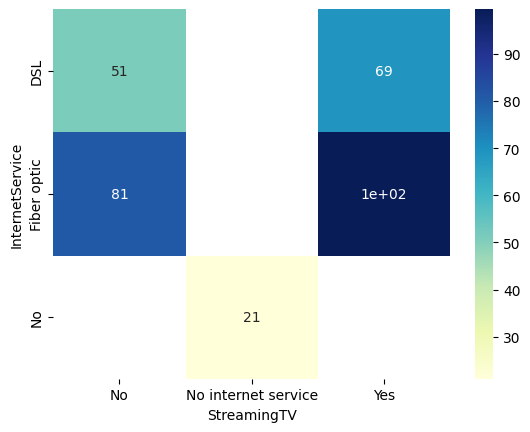

In [80]:
# Plot a heatmap of the pivot table
sns.heatmap(pivot, annot=True, cmap='YlGnBu')

In [82]:
# Filter the dataframe to only include customers who only use phone service
df = df[df['InternetService'] == 'No']

<AxesSubplot: xlabel='Contract', ylabel='count'>

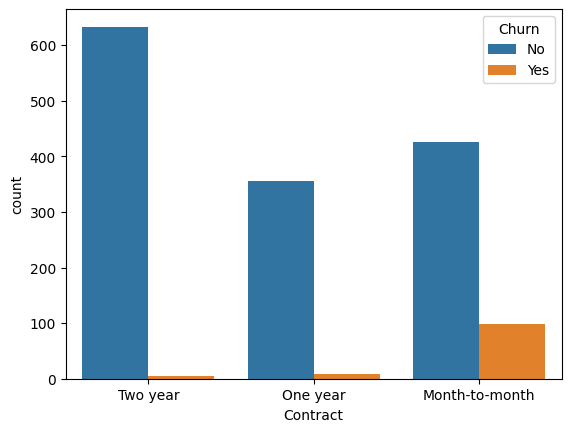

In [83]:
# Create a bar plot to show the percentage of customers who churned for each contract type
sns.countplot(x='Contract', hue='Churn', data=df)

In [84]:
# Payment: (Use visualizations in explaining your analysis)


<AxesSubplot: xlabel='MonthlyCharges', ylabel='Churn'>

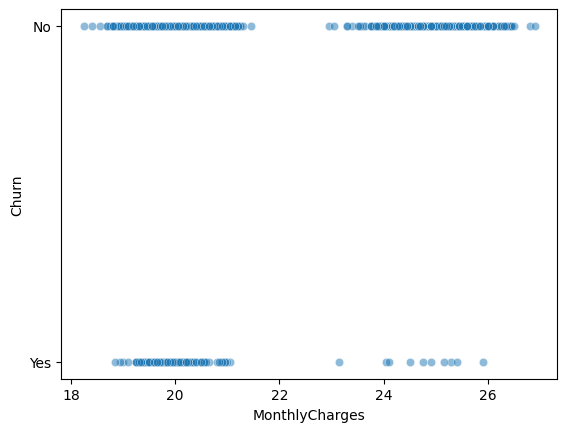

In [85]:
# Create a scatter plot to show the relationship between monthly charges and churn
sns.scatterplot(x='MonthlyCharges', y='Churn', data=df, alpha=0.5)

In [ ]:
#Whether or not the company should strictly go paperless for their monthly billings as a technique for keeping their customers depends on the preferences and habits of their customers. Going paperless may be beneficial in some cases, but it may also drive some customers away if they prefer to receive their bills in a physical format.

There are several benefits to going paperless, such as:

Increased efficiency and cost savings: Electronic billing eliminates the cost and time associated with printing, mailing, and handling paper bills.
Better customer experience: Electronic billing allows customers to view and pay their bills online, at any time and from any location, providing them with more flexibility and convenience.
Reduced waste and environmental impact: Going paperless helps reduce paper usage and the associated environmental impact of producing and disposing of paper bills.
However, there are also potential drawbacks to going paperless, such as:

Limited accessibility: Not all customers may have access to the internet or the technical skills needed to view and pay their bills online.
Privacy concerns: Some customers may be concerned about the security of their personal and financial information when paying bills online.
Preference for physical bills: Some customers may prefer to receive their bills in a physical format, for example, for record-keeping purposes or because they find it easier to review their billing information on paper.
Therefore, the company should consider the preferences and habits of their customers when deciding whether or not to go paperless for their monthly billings. They may want to survey their customers to gauge their opinions and preferences and use the results to inform their decision. Additionally, they could offer both paper and electronic bill options to accommodate customers with different preferences.